In [4]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.style.use("fivethirtyeight")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Clustering with LLM/train.csv")

In [53]:
#Reading training and testing data as dataframes
data = pd.read_csv("/content/drive/MyDrive/Clustering with LLM/train.csv",sep =";")
data = data.iloc[:, 0:8]
data

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


### **Observations:**
* 45211 rows.
* 8 Variables.
- 2 as int64.
- 6 as objects.
* No null values.

# **1. Basic Visualizations**

* **Categorical features proportions Function**

In [55]:
def counts_plot(y_var, col="w", ax=None):
    y_var_counts = (
        data.loc[:, y_var]
        .value_counts()
        .reset_index()
        .rename(columns={"index": y_var, y_var: "counts"})
        .assign(
            percent=lambda df_: (df_["counts"] / df_["counts"].sum()).round(2) * 100
        )
    )
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=y_var_counts,
        x="percent",
        y=y_var,
        color=col,
        ax=ax,
        order=y_var_counts[y_var],
    )
    values1 = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values1]
    ax0.bar_label(ax0.containers[0], labels=labels, fontsize=9, color="#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize=10)
    ax0.set_title(str.title(y_var) + " | proportions ", fontsize=10)
    return

* **Job, Housing, Marital, Education, Default, Loan Distributions**

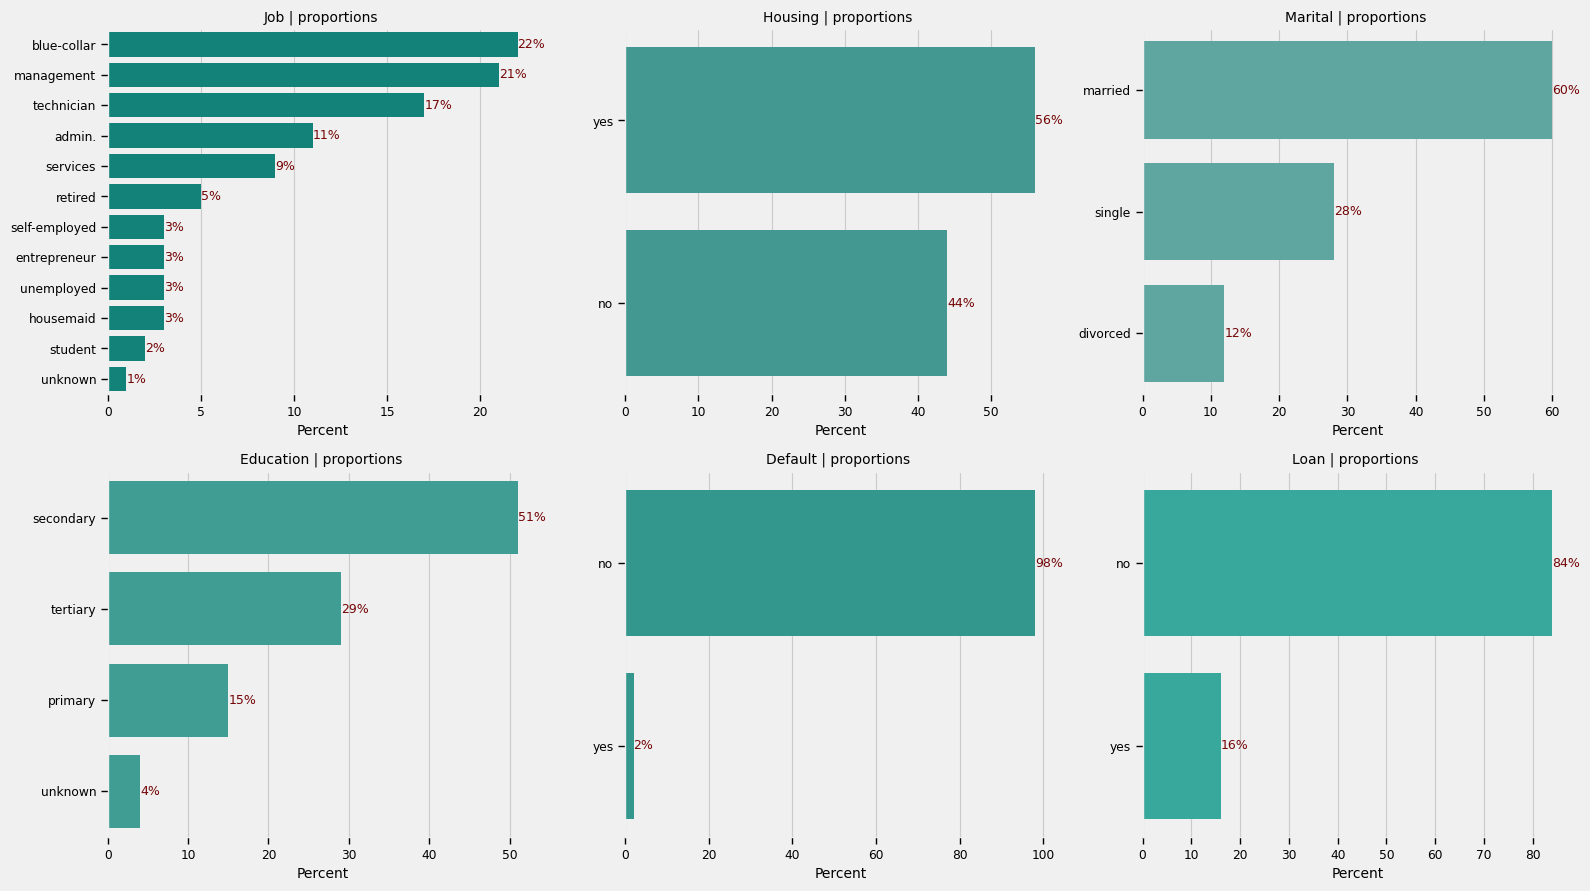

In [56]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16, 9))
counts_plot("job", ax=ax1, col="#009688")
counts_plot("housing", ax=ax2, col="#35a79c")
counts_plot("marital", ax=ax3, col="#54b2a9")
counts_plot("education", ax=ax4, col="#2fada1")
counts_plot("default", ax=ax5, col="#23a89b")
counts_plot("loan", ax=ax6, col="#27baab")
fig.tight_layout()
plt.show()


# **2. Correlation and Relationships**

 * **Converting categorical variables into numerical format**

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the DataFrame after label encoding
data.head()

,age,job,marital,education,default,balance,housing,loan
0,58,4,1,2,0,2143,1,0
1,44,9,2,1,0,29,1,0
2,33,2,1,1,0,2,1,1
3,47,1,1,3,0,1506,1,0
4,33,11,2,3,0,1,0,0


 * **Multivariate Analysis**

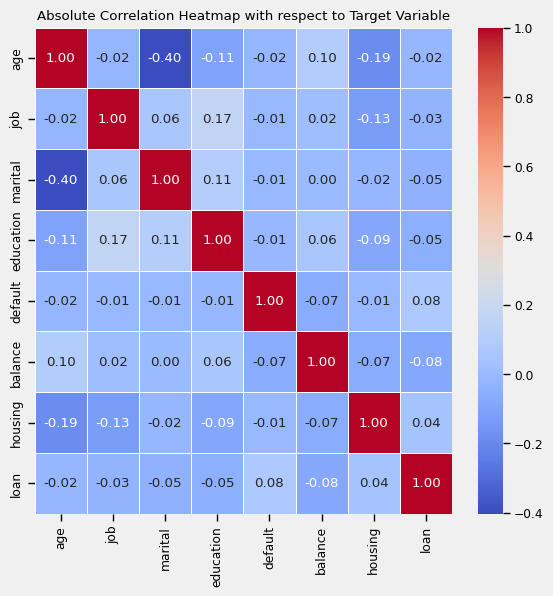

In [59]:
# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Absolute Correlation Heatmap with respect to Target Variable')
plt.show()